# Day 3 - AI ML Journey

## Machine Learning

### Introduction

Today’s goal is to compare how regularization affects model performance in predicting California housing prices using scikit-learn’s dataset.

We will:

- Import the necessary libraries <br />
- Load and prepare the dataset <br />
- Split the data into training and test sets <br />
- Train both Linear Regression and Ridge Regression models <br />
- Evaluate both models using R² and Mean Squared Error (MSE) <br />
- Analyze whether scaling and regularization were worth it <br />
- Validate the model using 5-fold cross-validation.
- Visually check for bias and heteroscedasticity using residual plots.
- Analyze whether scaling and regularization improve performance.

### 1. Importing Libraries

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

### 2. Additional Libraries for Day 3

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

### 3. Loading and Preparing the Dataset

In [23]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 4. Splitting Data into Train and Test Sets

In [24]:
x = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=48)

print("Train size:", x_train.shape)
print("Test size:", x_test.shape)

Train size: (14448, 8)
Test size: (6192, 8)


### 5. Building and Training the Models

#### a) Simple Linear Regression 

In [25]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_lr = linear_model.predict(x_test)

#### b) Ridge Regression (Regularized)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

#### c) Why use Ridge regression

| Model                 | What It Does                   | When It Helps                                |
| --------------------- | ------------------------------ | -------------------------------------------- |
| **Linear Regression** | Fits line minimizing MSE       | Simple and fast but can overfit              |
| **Ridge Regression**  | Adds penalty for large weights | Reduces overfitting, improves generalization |

Ridge adds an L2 penalty (α * Σw²) to the cost function, discouraging large coefficient values.
This prevents the model from “chasing noise” in training data.

### 6. Evaluation Metrics

In [27]:
# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Linear Model")
print("MSE:", mse_lr)
print("R2:", r2_lr)

print("\nRegularized Linear Model (Ridge)")
print("MSE:", mse_ridge)
print("R2:", r2_ridge)

Linear Model
MSE: 0.5371704148001524
R2: 0.6008838793086986

Regularized Linear Model (Ridge)
MSE: 0.5371821933361104
R2: 0.6008751278893176


### 7. Why Using Ridge Regression didn't give us a huge improvement ?

| Reason                | Explanation                                                    |
| --------------------- | -------------------------------------------------------------- |
| Dataset is clean      | No multicollinearity or noise, so regularization not impactful |
| Features are balanced | No extreme scale differences                                   |
| No overfitting        | Linear regression already generalized well                     |


#### When does Ridge Regression actually helps ?

- When dataset is large or noisy

- When features are correlated (multicollinearity)

- When model overfits the training data

- When you want smaller, more stable coefficients

### 8. Cross-Validation (5 - Fold)

In [30]:
cv_r2 = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2')
print(f"5-fold CV R2 mean: {cv_r2.mean():.4f}, std: {cv_r2.std():.4f}")

5-fold CV R2 mean: 0.6034, std: 0.0095


### 9. Residual Plot

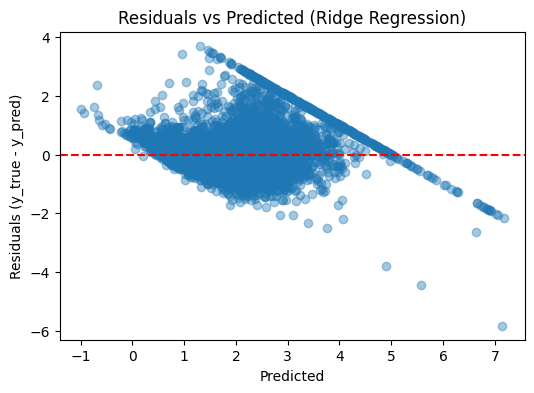

In [31]:
residuals = y_test - y_pred_ridge
plt.figure(figsize=(6,4))
plt.scatter(y_pred_ridge, residuals, alpha=0.4)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residuals vs Predicted (Ridge Regression)")
plt.show()

### 10. Conclusion 

1. Always start with Linear Regression as baseline

2. Use Ridge/Lasso + Scaling when:
    - Dataset is large or noisy
    - Features have different magnitudes
    - Model shows overfitting

3. Use Cross-Validation and Residual plots to verify model assumptions

## Leetcode

### Question

Today we will be solving Valid anagram, one of the most base problems in arrays and hashing.

#### 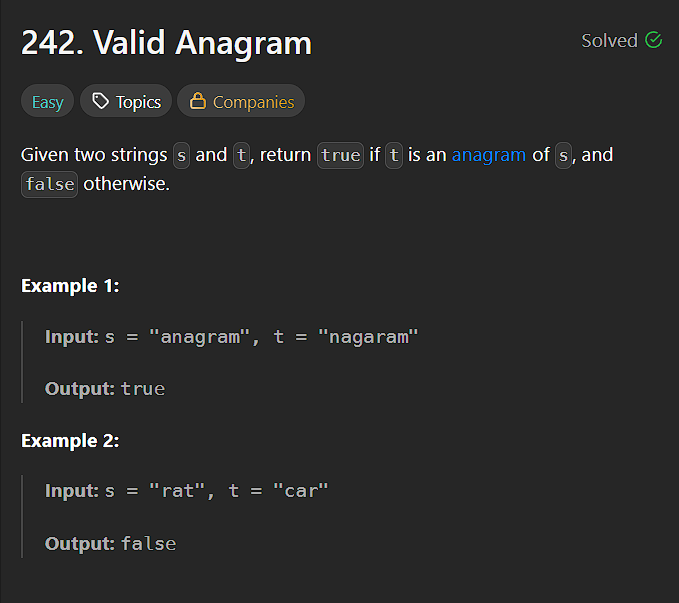

### Problem Statement

1] The problem asks us to check if the given two strings are anagrams.  
    A valid anagram are two words which have equal number of letters. <br />

2] Here, the two words may have shuffled letters like cat, tac. <br />


### Brute Force Approach

1] Create two dictionaries (a dictionary is a data structure in python which store data in form of key and value) <br />

2] Count each letter in both strings and put that count in respective dictionaries. <br />

3] Now, checking if both dictionaries are same will solve the problem.

Below you can see the solution for this approach:


#### 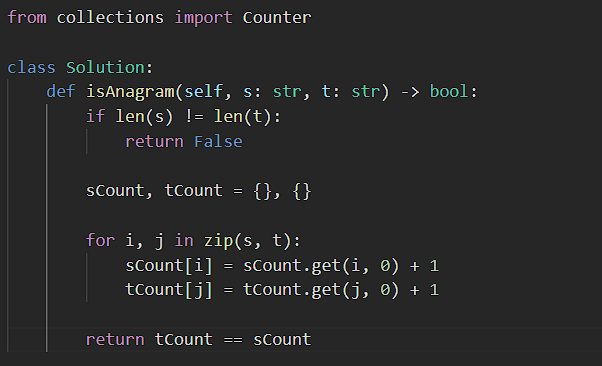

### Improved Approach with Counter

1] We can replace the dictionaries with counter as it will count on its own when we provide a string. <br />

2] The code will be just return Counter(s) == Counter(t) <br />

Below you can see the Approach with Counter : 

#### 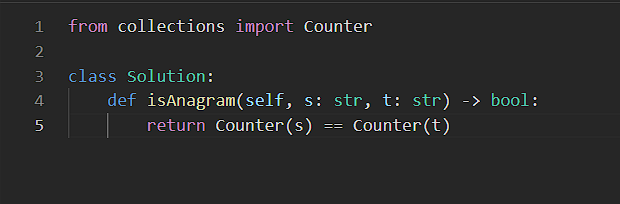

### Optimized Approach with one dictionary

1] Using two dictionaries is good, but not interview-perfect — companies value efficient resource utilization. <br />

2] We use one dictionary to store character counts of the first string s. <br />

3] For each character in the second string t, decrement the count in the dictionary. <br />

4] If a character isn’t present or its count becomes negative, it means the strings are not anagrams.<br />

5] If all counts are balanced (zero) by the end, return True ✅ <br />

#### 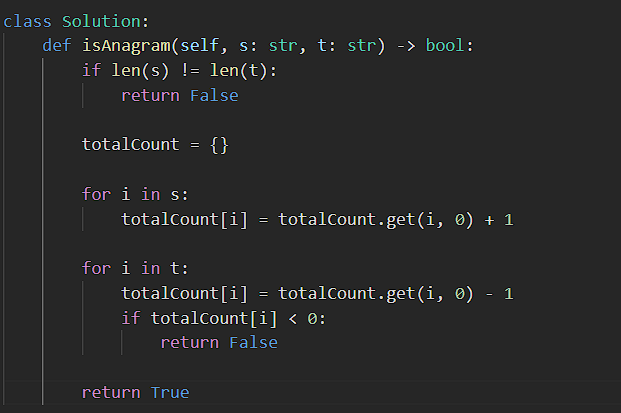

### Valid Anagram - Approaches & Explanation

| **Approach**                   | **Description**                                                                                                                                                    | **Time Complexity** | **Result**                              |
| ------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ | ------------------- | --------------------------------------- |
| **Two Dictionaries**           | Count frequency of characters in both strings separately, then compare both dictionaries.                                                                          | **O(n)**            | ✅ Acceptable but not optimal            |
| **Using `Counter`**            | Utilize Python’s built-in `collections.Counter` to simplify frequency comparison.                                                                                  | **O(n)**            | ✅ Clean & Pythonic                      |
| **One Dictionary (Optimized)** | Use a single dictionary to count characters from `s`, then decrement counts for characters in `t`. If any count goes negative or a key is missing, return `False`. | **O(n)**            | 🚀 Most Efficient & Interview-Preferred |


## Conclusion of Day 3

1. We learnt about dictionaries, Counter and also optimizing our coding.
2. We also improved our Linear regression model, we introduced a ridge regression model and compared the evaluation metrics of simple Linear model with our new ridge regression model.
3. We also learnt that ridge regression is useful when we have large amount of data, it can be used to prevent overfitting.
4. We also saw how to use cross validation to check if our model is overfitting.
5. We inspected our residuals to check bias, see how our data is distributed to check if our data isnt violating linear structure.